In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
X, Y = load_iris(return_X_y = True)

In [3]:
df = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = Y

In [4]:
X = df.drop(columns=['class'])
Y = df['class']

In [5]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)

DecisionTreeClassifier()

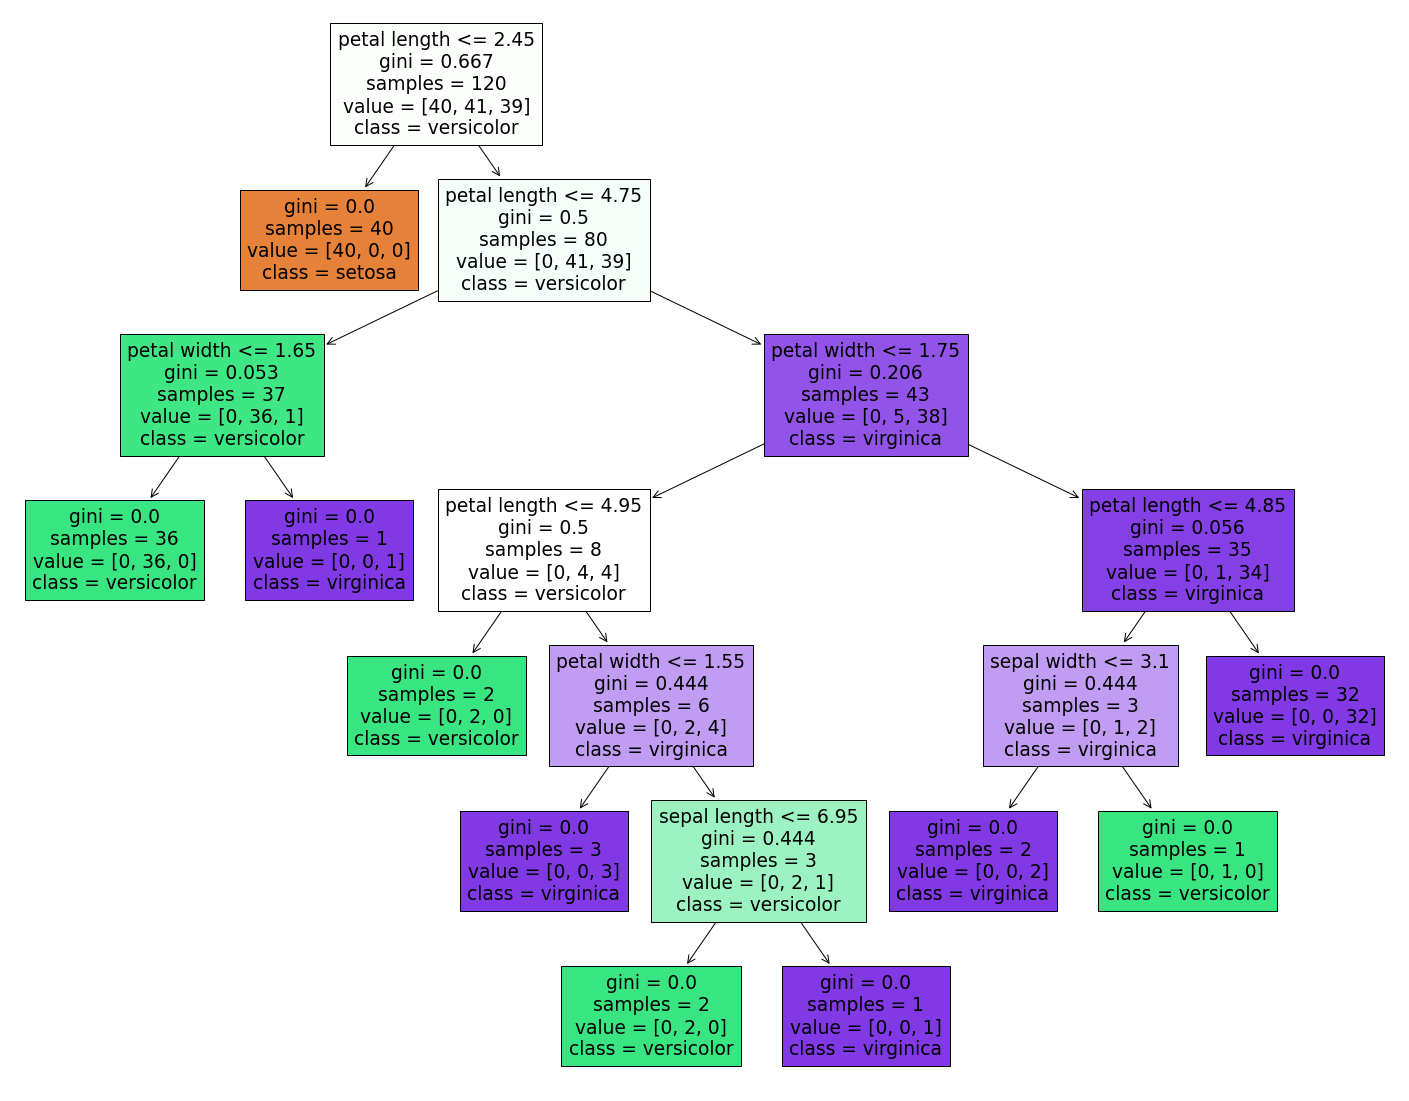

In [7]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                  feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
                  class_names=['setosa', 'versicolor', 'virginica'],
                  filled=True)

In [8]:
pred_X = model.predict(test_X)
print('test_X에 대한 예측 \n{}'.format(pred_X))

test_X에 대한 예측 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X, Y = load_breast_cancer(return_X_y = True)
X = np.array(X)
Y = np.array(Y)

print('전체 샘플 수: ', len(X))
print('X의 feature 수: ', len(X[0]))

전체 샘플 수:  569
X의 feature 수:  30


In [10]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

print('train set: ', len(train_Y))
print('클래스 0인 train set: ', len(train_Y)-sum(train_Y))
print('클래스 1인 train set: ', sum(train_Y))

print('test set: ', len(test_Y))
print('클래스 0인 test set: ', len(test_Y)-sum(test_Y))
print('클래스 1인 test set: ', sum(test_Y))

train set:  455
클래스 0인 train set:  169
클래스 1인 train set:  286
test set:  114
클래스 0인 test set:  43
클래스 1인 test set:  71


In [11]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)

y_pred_train = model.predict(train_X)
y_pred_test = model.predict(test_X)

In [12]:
cm_train = confusion_matrix(train_Y, y_pred_train)
print('Train Confusion Matrix: \n {}'.format(cm_train))

cm_test = confusion_matrix(test_Y, y_pred_test)
print('Test Confusion Matrix: \n {}'.format(cm_test))

Train Confusion Matrix: 
 [[169   0]
 [  0 286]]
Test Confusion Matrix: 
 [[40  3]
 [ 3 68]]


[Text(0.5, 1.0, 'Train Confusion Matrix'),
 Text(24.0, 0.5, 'True Label'),
 Text(0.5, 24.0, 'Predicted Label')]

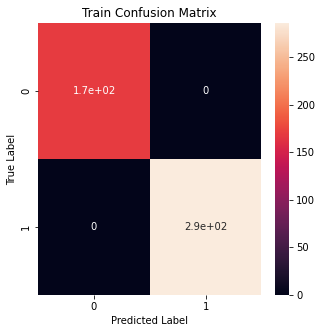

In [13]:
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm_train, annot=True)
ax.set(title='Train Confusion Matrix',
      ylabel="True Label",
      xlabel="Predicted Label")

[Text(0.5, 1.0, 'Test Confusion Matrix'),
 Text(24.0, 0.5, 'True Label'),
 Text(0.5, 24.0, 'Predicted Label')]

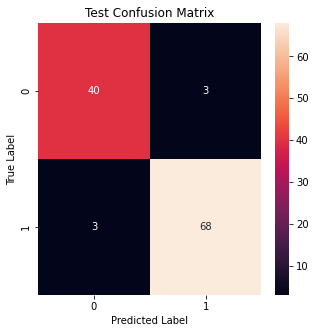

In [14]:
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm_test, annot=True)
ax.set(title='Test Confusion Matrix',
      ylabel="True Label",
      xlabel="Predicted Label")

In [15]:
acc_train = model.score(train_X, train_Y)
acc_test = model.score(test_X, test_Y)

print('train_X Accuracy: %f' % (acc_train))
print('test_X Accuracy: %f' % (acc_test))

train_X Accuracy: 1.000000
test_X Accuracy: 0.947368


In [16]:
precision_train = precision_score(train_Y, y_pred_train)
precision_test = precision_score(test_Y, y_pred_test)
print('train_X Precision: %f' % (precision_train))
print('test_X Percision: %f' % (precision_test))

train_X Precision: 1.000000
test_X Percision: 0.957746


In [17]:
recall_train = recall_score(train_Y, y_pred_train)
recall_test = recall_score(test_Y, y_pred_test)
print('train_X Recall: %f' % (recall_train))
print('test_X Recall: %f' % (recall_test))

train_X Recall: 1.000000
test_X Recall: 0.957746
